In [4]:
#@title Installations and mounting
!pip install tqdm
!pip install faiss
!pip install timm
!pip install opencv-python
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git
!git clone https://github.com/ShirAmir/dino-vit-features.git

^C


fatal: destination path 'dino-vit-features' already exists and is not an empty directory.


In [1]:
#@title Configuration:
#@markdown Choose image paths:

image_path1 = 'images/cat.jpg' #@param
image_path2 = 'images/ibex.jpg' #@param

#@markdown Choose number of points to output:
num_pairs = 10 #@param
#@markdown Choose loading size:
load_size = 224 #@param
#@markdown Choose layer of descriptor:
layer = 9 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=True #@param
#@markdown Choose fg / bg threshold:
thresh=0.05 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param

Using cache found in C:\Users\shiramir/.cache\torch\hub\facebookresearch_dino_main
C:\Users\shiramir\Anaconda3\envs\timm-env\lib\site-packages\torch\nn\functional.py:3609: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
C:\Users\shiramir\Anaconda3\envs\timm-env\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


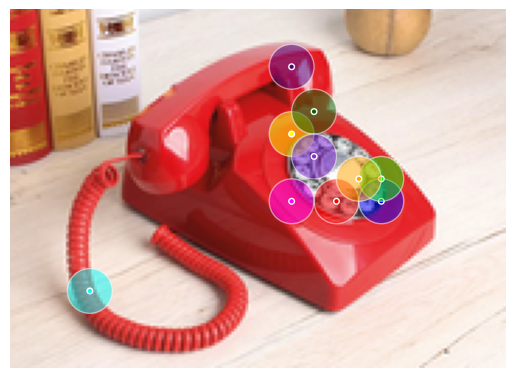

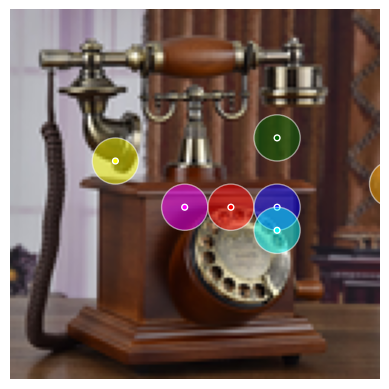

In [2]:
import matplotlib.pyplot as plt
import torch
from correspondences import find_correspondences, draw_correspondences

with torch.no_grad():
    points1, points2, image1_pil, image2_pil = find_correspondences(image_path1, image_path2, num_pairs, load_size, layer,
                                                                   facet, bin, thresh, model_type, stride)
fig1, fig2 = draw_correspondences(points1, points2, image1_pil, image2_pil)
plt.show()